In [11]:
import calmap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

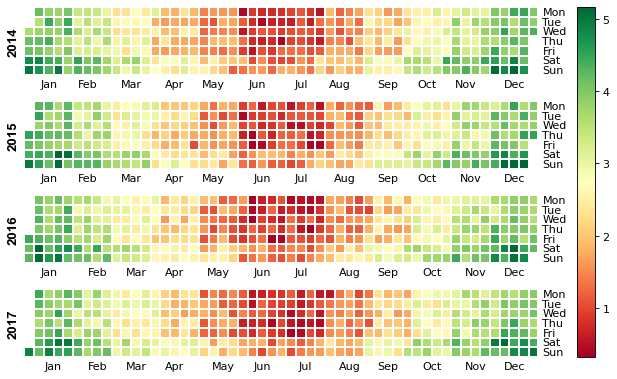

In [6]:
df = pd.read_csv('data/Calendar.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

fig, ax = calmap.calendarplot(df['value'], fillcolor='grey',
                              linecolor='w', linewidth=0.1, cmap='RdYlGn',
                              yearlabel_kws={'color': 'black', 'fontsize': 12},
                              fig_kws=dict(figsize=(10, 5), dpi=80))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())
plt.show()

In [23]:
month_label = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
week_label = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

df = pd.read_csv('data/Calendar.csv', parse_dates=['date'])
df['year'] = [d.year for d in df['date']]
df = df[df['year'] == 2015]
df['month'] = [d.month for d in df['date']]
df['monthf'] = df['month'].replace(np.arange(1, 13, 1), month_label)
df['monthf'] = df['monthf'].astype(pd.CategoricalDtype(categories=month_label, ordered=True))
df['week'] = [int(d.strftime('%W')) for d in df['date']]
df['weekay'] = [int(d.strftime('%u')) for d in df['date']]
df['weekdayf'] = df['weekay'].replace(np.arange(1, 8, 1), week_label)
df['weekdayf'] = df['weekdayf'].astype(pd.CategoricalDtype(categories=week_label, ordered=True))
df['day'] = [d.strftime('%d') for d in df['date']]
df['monthweek'] = df.groupby('monthf')['week'].apply(lambda x: x - x.min() + 1)

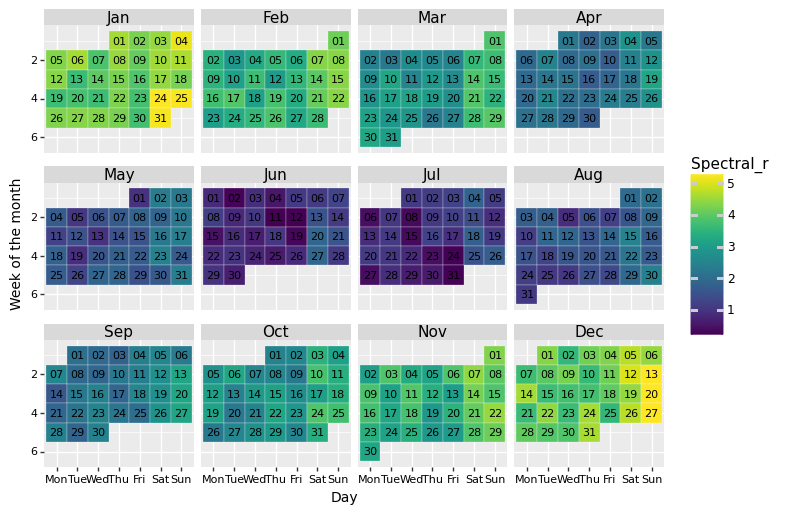

In [25]:
from plotnine import *

base_plot = (ggplot(df, aes('weekdayf', 'monthweek', fill='value')) +
             geom_tile(colour="white", size=0.1) +
             scale_fill_cmap(name='Spectral_r') +
             geom_text(aes(label='day'), size=8) +
             facet_wrap('~monthf', nrow=3) +
             scale_y_reverse() +
             xlab("Day") + ylab("Week of the month") +
             theme(strip_text=element_text(size=11, face="plain", color="black"),
                   axis_title=element_text(size=10, face="plain", color="black"),
                   axis_text=element_text(size=8, face="plain", color="black"),
                   legend_position='right',
                   legend_background=element_blank(),
                   aspect_ratio=0.85,
                   figure_size=(8, 8),
                   dpi=100
                   ))
print(base_plot)